# **Performance Evaluation in Deep Learning** 
This notebook is a step-by-step guide to understanding, implementing, and utilizing performance evaluation metrics in deep learning. We will guide you through the process of building a Convolutional Neural Network (CNN) *-Explain in _--* to classify images from the Fashion MNIST datase and explore how different metrics can guide us in improving the model.

Fashion MNIST is a dataset comprising 60,000 training images and 10,000 test images, each a 28x28 grayscale image associated with one of 10 fashion categories.

## Importing Libraries and Dataset
First, let's import TensorFlow and Keras, along with the Fashion MNIST dataset included within Keras.

In [34]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


## Preprocessing the Data

In [35]:
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


## Building the CNN Model

In [36]:
model = models.Sequential([
    # Convolutional base
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Dense layers for classification
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes in Fashion MNIST
])

model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 32)        │        320 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 64)        │     18,496 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 64)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten_5 (Flatten)             │ (None, 1600)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_10 (Dense)                │ (None, 64)                │    102,464 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_11 (Dense)                │ (None, 10)                │        650 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

## Compiling the Model

In [39]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


## Training the model

In [40]:
history = model.fit(train_images, train_labels, 
                    epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7539 - loss: 0.6818 - val_accuracy: 0.8726 - val_loss: 0.3487
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8798 - loss: 0.3325 - val_accuracy: 0.8863 - val_loss: 0.3149
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8987 - loss: 0.2792 - val_accuracy: 0.8923 - val_loss: 0.2891
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9097 - loss: 0.2483 - val_accuracy: 0.9083 - val_loss: 0.2549
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9166 - loss: 0.2260 - val_accuracy: 0.9071 - val_loss: 0.2669
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9293 - loss: 0.1878 - val_accuracy: 0.9062 - val_loss: 0.2622
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9353 - loss: 0.1729 - val_accuracy: 0.9145 - val_loss: 0.2443
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9410 - loss: 0

## **Accuracy**
Accuracy is the most intuitive performance measure. It is simply the ratio of correctly predicted observations to the total observations.

$$Accuracy = \frac{True Positives + True Negatives}{Total Observations}$$

**Use Case**: Useful when the target classes are well balanced.

## **Precision**

Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.

$$Precision = \frac {True Positives} {True Positives + False Positives}$$

**Use Case**: Important when the cost of a false positive is high.

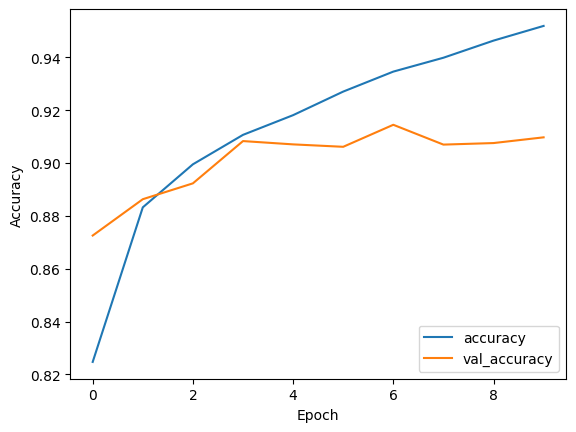

In [41]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

## **Recall**
Recall is the ratio of correctly predicted positive observations to all observations in the actual class.

$$ Recall = \frac {True Positives} {True Positives + False Negatives}$$

**Use Case**: Critical when the cost of a false negative is high.

## **F1 Score**
The F1 Score is the weighted average of Precision and Recall. It takes both false positives and false negatives into account.

$$ F1 Score = \frac {2 * (Precision * Recall)} {Precision + Recall}$$

**Use Case**: Useful when you want to seek a balance between Precision and Recall.

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict(test_images)
pred_labels = predictions.argmax(axis=1)
true_labels = test_labels.argmax(axis=1)
print(confusion_matrix(true_labels, pred_labels))
print(classification_report(true_labels, pred_labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[[882   1  21  10   4   1  72   0   9   0]
 [  2 982   0  10   3   0   1   0   2   0]
 [ 16   0 850   9  67   0  54   0   4   0]
 [ 17   7  12 898  36   0  26   0   4   0]
 [  2   1  41  34 899   0  21   0   2   0]
 [  0   0   0   0   0 984   0   9   1   6]
 [125   3  75  18 122   0 638   0  19   0]
 [  0   0   0   0   0  17   0 954   2  27]
 [  4   0   3   4   4   3   2   1 979   0]
 [  0   0   0   0   0   9   0  29   2 960]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.85      0.85      0.85      1000
           3       0.91      0.90      0.91      1000
           4       0.79      0.90      0.84      1000
           5       0.97      0.98      0.98      1000
           6       0.78      0.64      0.70      1000
           7       0.96      0.95      0.96      1000
           8       0.96      0.98      0.

## **Confusion Matrix**

Table used in classification tasks to visualize the performance of an algorithm. It shows the actual versus predicted classifications, allowing for the identification of true positives, true negatives, false positives, and false negatives. This matrix provides insights into the types of errors being made by the classifier and the accuracy of classifications, serving as a foundation for calculating metrics like precision, recall, and F1 score.

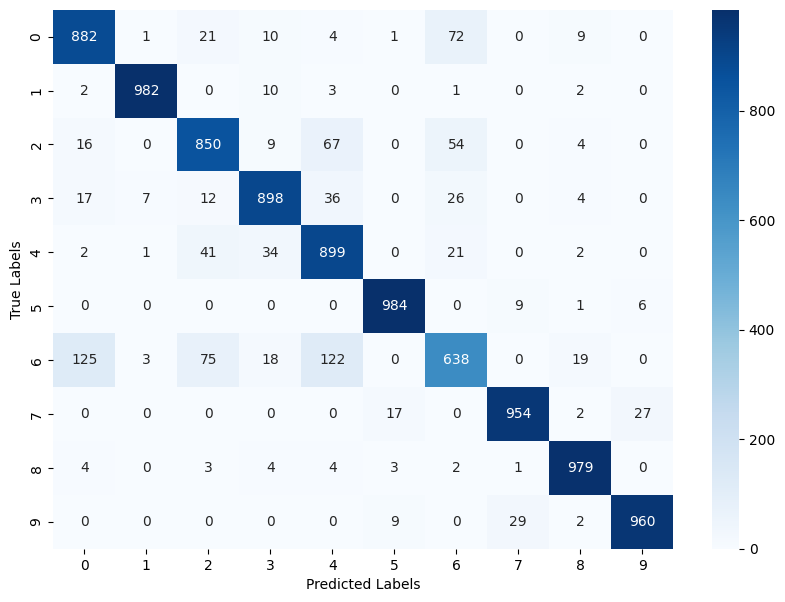

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
